Ги вчитуваме потребните библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/ProektVNP/ProektVNP_dataset.csv')

Проверуваме дали имаме null вредности

In [4]:
data.isnull().sum()

Country           0
Year              0
Month             0
Food Item         0
Measurement       0
Average Price     0
Currency          0
dtype: int64

In [5]:
data

,Country,Year,Month,Food Item,Measurement,Average Price,Currency
0,Canada,2018,1,Bread,Loaf,2.82,CAD
1,Canada,2018,2,Bread,Loaf,2.75,CAD
2,Canada,2018,3,Bread,Loaf,2.72,CAD
3,Canada,2018,4,Bread,Loaf,2.73,CAD
4,Canada,2018,5,Bread,Loaf,2.79,CAD
...,...,...,...,...,...,...,...
571,Canada,2021,8,Mushrooms,1 Kg,9.79,CAD
572,Canada,2021,9,Mushrooms,1 Kg,9.68,CAD
573,Canada,2021,10,Mushrooms,1 Kg,9.43,CAD
574,Canada,2021,11,Mushrooms,1 Kg,9.74,CAD


In [6]:
data.columns

Index(['Country ', 'Year ', 'Month ', 'Food Item ', 'Measurement',
       'Average Price ', 'Currency '],
      dtype='object')

In [7]:
data['Food Item '].nunique()

12

**Имаме 12 производи**

In [8]:
data_plt = data.copy()

Правиме визуелизација на податоците

In [9]:
import matplotlib.pyplot as plt

Колоните за година и месец ги спојуваме во година-месец формат, за подобра визуелизација.

In [10]:
data["Date"] = pd.to_datetime(data["Year "].astype(str) + '/' + data["Month "].astype(str).str.zfill(2)).dt.strftime('%Y-%m')

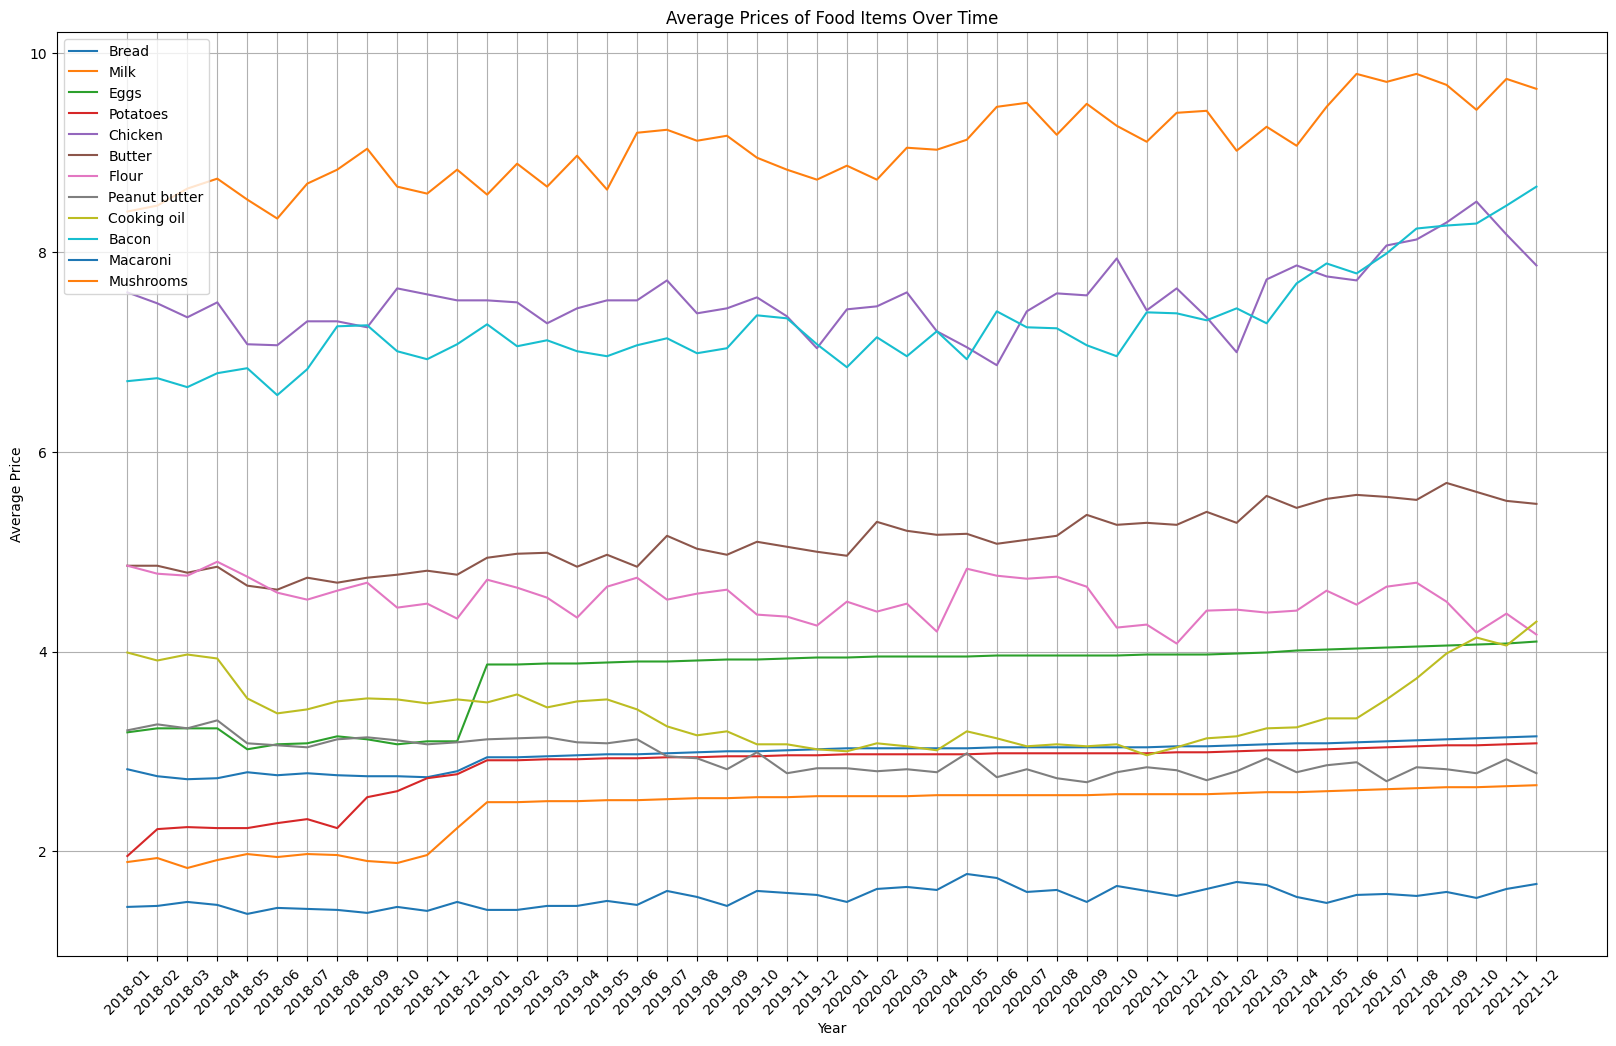

In [11]:
food_items = data['Food Item '].unique()

plt.figure(figsize=(20, 12))

for food_item in food_items:
    food_data = data[data['Food Item '] == food_item]
    plt.plot(food_data['Date'], food_data['Average Price '], label=food_item)

plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Prices of Food Items Over Time')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()

Гледаме дека цените на скоро сите прозводи се зголемени во периодот од 4 години.

##LSTM

In [101]:
data1 = data.copy()

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [103]:
le = LabelEncoder()

Ги енкодираме вредностите за производите

In [104]:
data1['Food Item '] = le.fit_transform(data1['Food Item '])

In [105]:
data1

,Country,Year,Month,Food Item,Measurement,Average Price,Currency,Date
0,Canada,2018,1,1,Loaf,2.82,CAD,2018-01
1,Canada,2018,2,1,Loaf,2.75,CAD,2018-02
2,Canada,2018,3,1,Loaf,2.72,CAD,2018-03
3,Canada,2018,4,1,Loaf,2.73,CAD,2018-04
4,Canada,2018,5,1,Loaf,2.79,CAD,2018-05
...,...,...,...,...,...,...,...,...
571,Canada,2021,8,9,1 Kg,9.79,CAD,2021-08
572,Canada,2021,9,9,1 Kg,9.68,CAD,2021-09
573,Canada,2021,10,9,1 Kg,9.43,CAD,2021-10
574,Canada,2021,11,9,1 Kg,9.74,CAD,2021-11


Правиме drop на непотребните колони.

In [106]:
data1 = data1.drop('Country ', axis=1)
data1 = data1.drop('Date', axis=1)
data1 = data1.drop('Measurement', axis=1)
data1 = data1.drop('Currency ', axis=1)

In [107]:
data1

,Year,Month,Food Item,Average Price
0,2018,1,1,2.82
1,2018,2,1,2.75
2,2018,3,1,2.72
3,2018,4,1,2.73
4,2018,5,1,2.79
...,...,...,...,...
571,2021,8,9,9.79
572,2021,9,9,9.68
573,2021,10,9,9.43
574,2021,11,9,9.74


In [108]:
data1['Food Item '].unique()

array([ 1,  8,  5, 11,  3,  2,  6, 10,  4,  0,  7,  9])

In [109]:
x = data1.drop('Average Price ', axis=1)
y = data1.iloc[:, -1:]

In [110]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

In [111]:
scaler = StandardScaler()

In [112]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [113]:
from keras.layers import Dense, LSTM
from keras.models import Sequential

In [114]:
X_train.shape

(460, 3)

In [115]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [116]:
X_train.shape

(460, 1, 3)

In [117]:
model = Sequential()

model.add(LSTM(80, input_shape=(1,3), activation='relu', return_sequences=True))

model.add(LSTM(64, activation='relu'))

model.add(Dense(1 ,activation='linear'))

In [118]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [119]:
history = model.fit(X_train, Y_train, shuffle=False, validation_split=0.2, epochs=400, batch_size=16)

Epoch 1/400
23/23 [==============================] - 6s 36ms/step - loss: 24.1227 - mean_absolute_error: 4.3545 - val_loss: 24.4933 - val_mean_absolute_error: 4.3942
Epoch 2/400
23/23 [==============================] - 0s 7ms/step - loss: 22.8057 - mean_absolute_error: 4.2007 - val_loss: 22.5290 - val_mean_absolute_error: 4.1638
Epoch 3/400
23/23 [==============================] - 0s 5ms/step - loss: 19.6931 - mean_absolute_error: 3.8124 - val_loss: 17.8665 - val_mean_absolute_error: 3.5552
Epoch 4/400
23/23 [==============================] - 0s 5ms/step - loss: 12.9251 - mean_absolute_error: 2.8095 - val_loss: 9.4834 - val_mean_absolute_error: 2.1904
Epoch 5/400
23/23 [==============================] - 0s 5ms/step - loss: 6.0224 - mean_absolute_error: 1.7997 - val_loss: 6.8995 - val_mean_absolute_error: 2.0934
Epoch 6/400
23/23 [==============================] - 0s 6ms/step - loss: 5.1031 - mean_absolute_error: 1.7049 - val_loss: 6.6114 - val_mean_absolute_error: 1.9997
Epoch 7/400
23

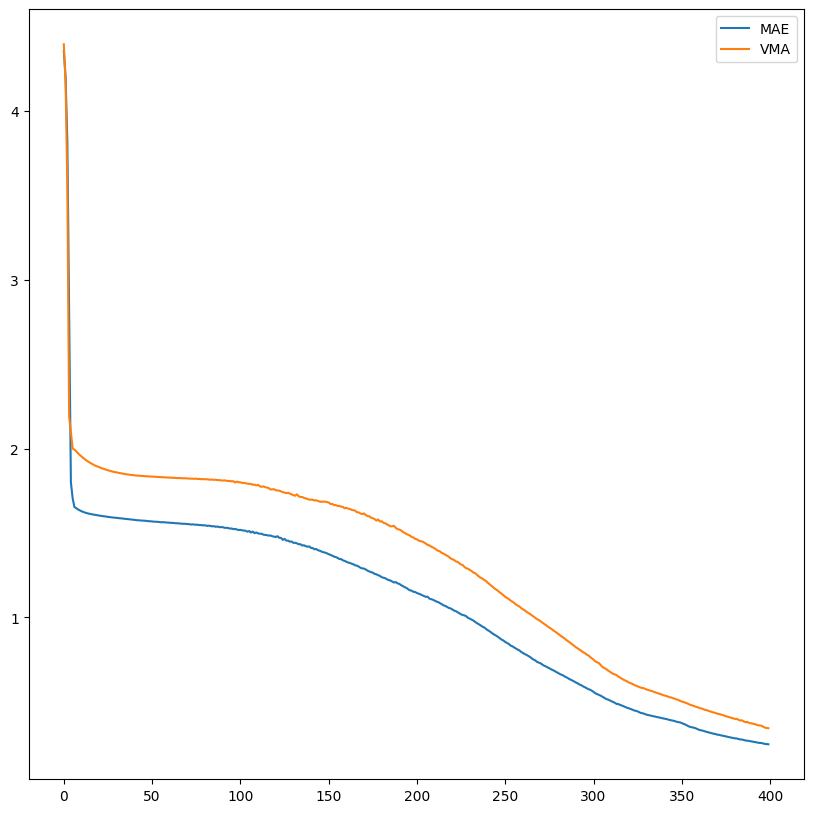

In [120]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(history.history['mean_absolute_error'], label='MAE')
plt.plot(history.history['val_mean_absolute_error'], label='VMA')
plt.legend()

In [121]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 6ms/step


In [122]:
from sklearn.metrics import r2_score

r2_score(Y_test,y_pred)

0.9446628963950023

##Linear Regression

In [34]:
data2 = data.copy()

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
model = LinearRegression()

In [37]:
data2['Food Item '] = le.fit_transform(data2['Food Item '])

In [38]:
data2 = data2.drop('Country ', axis=1)
data2 = data2.drop('Measurement', axis=1)
data2 = data2.drop('Currency ', axis=1)
data2 = data2.drop('Date', axis=1)

In [39]:
data2

,Year,Month,Food Item,Average Price
0,2018,1,1,2.82
1,2018,2,1,2.75
2,2018,3,1,2.72
3,2018,4,1,2.73
4,2018,5,1,2.79
...,...,...,...,...
571,2021,8,9,9.79
572,2021,9,9,9.68
573,2021,10,9,9.43
574,2021,11,9,9.74


In [40]:
x = data2.iloc[:, 0:-1]
y = data2.iloc[:, -1:]

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

In [42]:
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
model.fit(X_train, Y_train)

LinearRegression()

In [44]:
pred = model.predict(X_test)

In [45]:
r2_score(Y_test,pred)

0.1343452665228374

##CatBoost

In [46]:
data3 = data.copy()

In [47]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.5 MB/s eta 0:00:00


In [48]:
from catboost import CatBoostRegressor

In [49]:
data3['Food Item '] = le.fit_transform(data3['Food Item '])

In [50]:
data3 = data3.select_dtypes(exclude='object')

In [51]:
data3

,Year,Month,Food Item,Average Price
0,2018,1,1,2.82
1,2018,2,1,2.75
2,2018,3,1,2.72
3,2018,4,1,2.73
4,2018,5,1,2.79
...,...,...,...,...
571,2021,8,9,9.79
572,2021,9,9,9.68
573,2021,10,9,9.43
574,2021,11,9,9.74


In [52]:
x = data2.iloc[:, 0:-1]
y = data2.iloc[:, -1:]

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

In [54]:
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
model = CatBoostRegressor()

In [56]:
model.fit(X_train, Y_train)

Learning rate set to 0.036216
0:	learn: 2.2551821	total: 46.4ms	remaining: 46.4s
1:	learn: 2.2304821	total: 47.2ms	remaining: 23.5s
2:	learn: 2.1782771	total: 47.7ms	remaining: 15.9s
3:	learn: 2.1530588	total: 48.2ms	remaining: 12s
4:	learn: 2.0961480	total: 48.7ms	remaining: 9.69s
5:	learn: 2.0489600	total: 49.1ms	remaining: 8.14s
6:	learn: 2.0115026	total: 49.6ms	remaining: 7.04s
7:	learn: 1.9698200	total: 50.1ms	remaining: 6.21s
8:	learn: 1.9206108	total: 50.5ms	remaining: 5.56s
9:	learn: 1.8633251	total: 51ms	remaining: 5.05s
10:	learn: 1.8127571	total: 51.5ms	remaining: 4.63s
11:	learn: 1.7687577	total: 51.9ms	remaining: 4.28s
12:	learn: 1.7332627	total: 52.4ms	remaining: 3.98s
13:	learn: 1.6877594	total: 52.9ms	remaining: 3.72s
14:	learn: 1.6440106	total: 53.3ms	remaining: 3.5s
15:	learn: 1.6097465	total: 53.8ms	remaining: 3.31s
16:	learn: 1.5975652	total: 54.2ms	remaining: 3.13s
17:	learn: 1.5609504	total: 54.6ms	remaining: 2.98s
18:	learn: 1.5457546	total: 55.1ms	remaining: 2.8

In [57]:
y_pred = model.predict(X_test)

In [58]:
r2_score(Y_test, y_pred)

0.9960429119694476